In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def alarm_generate(x, var_list):
    '''alarm_generate is a function when return a vector '''
    t_delay = 0
    t_dead = 0
    log_alarm = np.arange(len(x))
  
    if var_list["type_var"] == 'high':
        for i in np.arange(len(x)):
            if x[i] > var_list["limit"]:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0
    else:
        for i in np.arange(len(x)):
            if x[i] < limit:
                t_dead = 0
                t_delay = t_delay + 3/len(x)
                if t_delay >= var_list["delay_time"]:
                    log_alarm[i] = 1
                else:
                    log_alarm[i] = 0
            else:
                if log_alarm[i-1] == 1:
                    t_dead = t_dead + 3/len(x)
                    if t_dead >= var_list["dead_band_delay"]:
                        log_alarm[i] = 0
                        t_delay = 0
                        t_dead = 0
                    else:
                        log_alarm[i] = 1
                else:
                    t_delay = 0
                    t_dead = 0
                    log_alarm[i] = 0

    return log_alarm

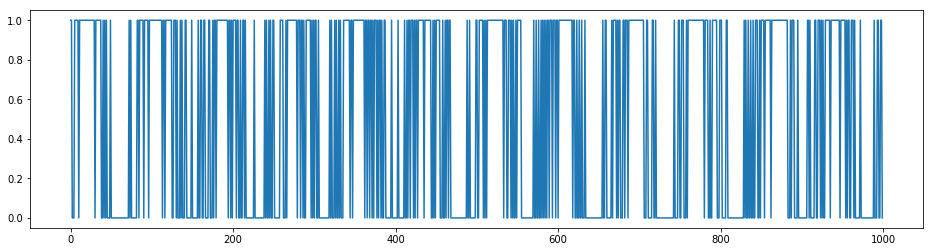

In [25]:
var_list = {
    "limit": 1,
    "type_var":'high', 
    "delay_time" : 10*3/10000, 
    "dead_band_delay" : 10*3/10000
}

t = np.linspace(0, 50, 1000)
ruido = np.random.uniform(-1,1,1000)
x = np.sin((t + ruido)*1.5)+1 

log = alarm_generate(x,var_list)
plt.figure(figsize=(16,4))
plt.plot(log)

In [26]:
run_lengths = []
count = 0
for i in np.arange(1000):
    if log[i] == 0:
        count+=1
    else:
        if count != 0:
            run_lengths.append(count)
            count = 0
        else:
            pass
    

In [27]:
run_lengths
print(run_lengths)
print(len(run_lengths))

[3, 1, 1, 2, 1, 1, 4, 22, 1, 7, 1, 1, 1, 1, 1, 2, 1, 3, 1, 3, 6, 7, 2, 2, 4, 3, 1, 1, 1, 1, 1, 1, 2, 2, 1, 10, 12, 1, 2, 1, 2, 7, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 13, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 7, 7, 7, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 20, 2, 7, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 15, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 21, 2, 6, 1, 1, 1, 3, 1, 1, 3, 5, 2, 22, 4, 2, 3, 1, 1, 2, 2, 3, 5, 20, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 1, 4, 11, 1, 5, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 6, 16, 3, 2]
169


In [33]:
a = run_lengths
bins  = np.arange(max(run_lengths)-1)

x = np.histogram(a,22)
Pr = []
for i in np.arange(len(x[0])):
        Pr.append(x[0][i]/sum(x[0]))

chat_Index = []
    
print(x[0])
print()
print(x[1])
print()
print(Pr)

[87 39 15  4  3  3  7  0  0  1  1  1  1  0  1  1  0  0  0  2  1  2]

[ 1.          1.95454545  2.90909091  3.86363636  4.81818182  5.77272727
  6.72727273  7.68181818  8.63636364  9.59090909 10.54545455 11.5
 12.45454545 13.40909091 14.36363636 15.31818182 16.27272727 17.22727273
 18.18181818 19.13636364 20.09090909 21.04545455 22.        ]

[0.514792899408284, 0.23076923076923078, 0.08875739644970414, 0.023668639053254437, 0.01775147928994083, 0.01775147928994083, 0.04142011834319527, 0.0, 0.0, 0.005917159763313609, 0.005917159763313609, 0.005917159763313609, 0.005917159763313609, 0.0, 0.005917159763313609, 0.005917159763313609, 0.0, 0.0, 0.0, 0.011834319526627219, 0.005917159763313609, 0.011834319526627219]


(array([93., 33., 10.,  2.,  6.,  2.,  2.,  3.,  0.,  1.,  1.,  2.,  0.,
         0.,  1.,  1.,  2.,  0.,  0.,  1.,  2.,  1.]),
 array([ 1.        ,  1.95454545,  2.90909091,  3.86363636,  4.81818182,
         5.77272727,  6.72727273,  7.68181818,  8.63636364,  9.59090909,
        10.54545455, 11.5       , 12.45454545, 13.40909091, 14.36363636,
        15.31818182, 16.27272727, 17.22727273, 18.18181818, 19.13636364,
        20.09090909, 21.04545455, 22.        ]),
 <a list of 22 Patch objects>)

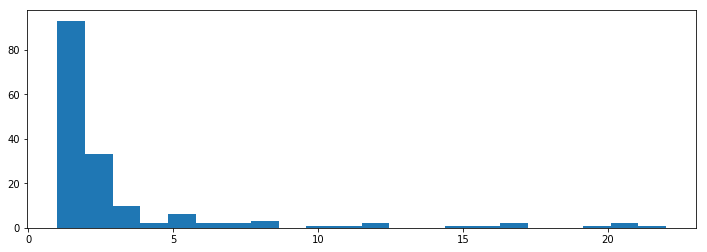

In [23]:
a = run_lengths
plt.figure(figsize=(12,4))
plt.hist(a, bins=22)
#plt.grid(True)